20 MAR 2016<br/>
source: [An Introduction to Machine Learning with Python](http://blog.districtdatalabs.com/an-introduction-to-machine-learning-with-python)

## The Scikit-learn API

The Scikit-learn API is an object-oriented interface centered around the concept of an **`Estimator`** — broadly any object that can learn from data. Each estimator in Scikit-learn has a `fit` and a `predict` method.

The **`Estimator.fit`** method sets the state of the estimator based on the training data.

**`Estimator.predict`** generates predictions: predicted regression values in the case of regression, or the corresponding class labels in the case of classification.

A **`transformer`** is a special type of estimator that transforms input data by selecting a subset of the available features or extracting new features based on the original ones. Transformers can be used to normalize or scale features, or to impute missing values.

## Models in Scikit-learn

### Regression

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_boston

diabetes = load_diabetes()
boston = load_boston()

In [2]:
print diabetes.viewkeys()

print 'data shape:', diabetes['data'].shape
print 'target shape:', diabetes['target'].shape

dict_keys(['data', 'target'])
data shape: (442, 10)
target shape: (442,)


In [3]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

**Mean squared error**, which indicates a regression model’s error in terms of precision (variance) and accuracy (bias), and **coefficient of determination or R2 score** (a ratio of explained variance to total variance), which illustrates how well the prediction fits the data.

#### Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(diabetes.data, diabetes.target)

expected = diabetes.target
predicted = model.predict(diabetes.data)

print "Linear regression model\nDiabetes dataset"
print "Mean squared error = {:0.3f}".format(mse(expected, predicted))
print "R2 score = {:0.3f}".format(r2_score(expected, predicted))

Linear regression model
Diabetes dataset
Mean squared error = 2859.690
R2 score = 0.518


In [13]:
model.fit(boston.data, boston.target)

expected = boston.target
predicted = model.predict(boston.data)

print "Linear regression model\nBoston dataset"
print "Mean squared error = {:0.3f}".format(mse(expected, predicted))
print "R2 score = {:0.3f}".format(r2_score(expected, predicted))

Linear regression model
Boston dataset
Mean squared error = 21.898
R2 score = 0.741


#### Regularization: Ridge Regression

*Regularization* methods penalize the complexity of a model to limit overfitting and help with generalization. Compared to a standard linear regression, the slope will tend to be more stable and the variance smaller.

In [14]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1)
model.fit(diabetes.data, diabetes.target)

expected = diabetes.target
predicted = model.predict(diabetes.data)

print "Ridge regression model\nDiabetes dataset"
print "Mean squared error = {:0.3f}".format(mse(expected, predicted))
print "R2 score = {:0.3f}".format(r2_score(expected, predicted))

Ridge regression model
Diabetes dataset
Mean squared error = 2890.445
R2 score = 0.513


In [15]:
model.fit(boston.data, boston.target)

expected = boston.target
predicted = model.predict(boston.data)

print "Ridge regression model\nBoston dataset"
print "Mean squared error = {:0.3f}".format(mse(expected, predicted))
print "R2 score = {:0.3f}".format(r2_score(expected, predicted))

Ridge regression model
Boston dataset
Mean squared error = 21.901
R2 score = 0.741


#### Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(diabetes.data, diabetes.target)

expected = diabetes.target
predicted = model.predict(diabetes.data)

print "Random forest model\nDiabetes dataset"
print "Mean squared error = {:0.3f}".format(mse(expected, predicted))
print "R2 score = {:0.3f}".format(r2_score(expected, predicted))

Random forest model
Diabetes dataset
Mean squared error = 605.153
R2 score = 0.898


In [18]:
model.fit(boston.data, boston.target)

expected = boston.target
predicted = model.predict(boston.data)

print "Random forest model\nBoston dataset"
print "Mean squared error = {:0.3f}".format(mse(expected, predicted))
print "R2 score = {:0.3f}".format(r2_score(expected, predicted))

Random forest model
Boston dataset
Mean squared error = 1.703
R2 score = 0.980


### Classification

In [4]:
import pandas as pd
import requests

In [5]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
response = requests.get(URL)

In [7]:
response.text[:100]

u'30,64,1,1\n30,62,3,1\n30,65,0,1\n31,59,2,1\n31,65,4,1\n33,58,10,1\n33,60,0,1\n34,59,0,2\n34,66,9,2\n34,58,30,'

In [9]:
response.content[:100]

'30,64,1,1\n30,62,3,1\n30,65,0,1\n31,59,2,1\n31,65,4,1\n33,58,10,1\n33,60,0,1\n34,59,0,2\n34,66,9,2\n34,58,30,'

`r.text` is the content of the response in unicode, and `r.content` is the content of the response in bytes.

In [10]:
print 'text type:', type(response.text)
print 'content type:', type(response.content)

text type: <type 'unicode'>
content type: <type 'str'>


In [11]:
with open('in/haberman.csv', 'w') as f:
    f.write(response.content)

In [12]:
df = pd.read_csv('in/haberman.csv', header=None, names=["age_at_op","op_yr","nr_nodes","survival"])

df.head()

,age_at_op,op_yr,nr_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age_at_op    306 non-null int64
op_yr        306 non-null int64
nr_nodes     306 non-null int64
survival     306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [14]:
FEATURES = df[["age_at_op","op_yr","nr_nodes"]]
TARGETS = df[["survival"]]

#### A Word on Cross-Validation

In *supervised machine learning*, data are divided into training and test sets. But what if certain chunks of the data have more variance than others? It's important to get into the habit of using cross validation (we like to **use 12 folds**) to ensure that your models perform just as well regardless of the particular way the data are divided up.

In [15]:
from sklearn import cross_validation as cv

splits = cv.train_test_split(FEATURES, TARGETS, test_size=0.2)
X_train, X_test, y_train, y_test = splits

In [16]:
from sklearn.metrics import classification_report

The `classification_report` will give us the precision, accuracy and recall scores for each classifier.

**Precision** is the number of correct positive results divided by the number of all positive results.<br/>
**Recall** is the number of correct positive results divided by the number of positive results that should have been returned.<br/>
The **F1 score** is a measure of a test's accuracy. It considers both the precision and the recall of the test to compute the score. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst at 0.

Metric | Equation | Interpretation
--- | --- | ---
precision | = true positives / (true positives + false positives) | positive predictive value
recall | = true positives / (false negatives + true positives) | sensitivity
F1 score | = 2 * ((precision * recall) / (precision + recall)) | accuracy

#### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())

expected = y_test
predicted = model.predict(X_test)

print "Logistic Regression Classifier\nHaberman survival dataset"
print classification_report(expected, predicted, target_names=[">=5 years","<5 years"])

Logistic Regression Classifier
Haberman survival dataset
             precision    recall  f1-score   support

  >=5 years       0.71      0.95      0.82        44
   <5 years       0.33      0.06      0.10        18

avg / total       0.60      0.69      0.61        62



#### SVMs

In [26]:
from sklearn.svm import SVC

model = SVC() # The default parameters for SVC are a radial basis function kernel of degree 3
model.fit(X_train, y_train.values.ravel())

expected = y_test
predicted = model.predict(X_test)

print "Support Vector Machine Classifier\nHaberman survival dataset"
print classification_report(expected, predicted, target_names=[">=5 years","<5 years"])

Support Vector Machine Classifier
Haberman survival dataset
             precision    recall  f1-score   support

  >=5 years       0.72      1.00      0.84        44
   <5 years       1.00      0.06      0.11        18

avg / total       0.80      0.73      0.63        62



In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train.values.ravel())

expected = y_test
predicted = model.predict(X_test)

print "Random Forest Classifier\nHaberman survival dataset"
print classification_report(expected, predicted, target_names=[">=5 years","<5 years"])

Random Forest Classifier
Haberman survival dataset
             precision    recall  f1-score   support

  >=5 years       0.72      0.82      0.77        44
   <5 years       0.33      0.22      0.27        18

avg / total       0.61      0.65      0.62        62



### Clustering

Clustering algorithms attempt to find patterns in unlabeled data. They are usually grouped into two main categories: *centroidal* (to find the centers of clusters) and *hierarchical* (to find clusters of clusters).

In order to explore clustering, let's pull another dataset from the UCI repository, this one on [grocery store customer spending behavior](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers):

In [29]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
response = requests.get(URL)
with open('in/customers.csv', 'w') as f:
    f.write(response.content)

df = pd.read_csv('in/customers.csv', usecols=["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"])

df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


#### K-Means Clustering

In [30]:
df.values

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ..., 
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

In [31]:
from sklearn.cluster import KMeans

data = df.values
model = KMeans(n_clusters=7)
model.fit(data)

labels = model.labels_
centroids = model.cluster_centers_

In [37]:
data.shape

(440, 6)

In [38]:
labels.shape

(440,)

In [32]:
len(centroids)

7

In [39]:
centroids

array([[ 21855.63265306,   4023.68367347,   5327.81632653,   3962.70408163,
          1169.25510204,   1742.95918367],
       [  6264.89473684,  17153.57894737,  24637.76315789,   2132.86842105,
         10733.23684211,   2420.97368421],
       [  4193.5       ,   7703.03333333,  11501.64444444,   1250.77777778,
          4991.32222222,   1351.04444444],
       [ 25603.        ,  43460.6       ,  61472.2       ,   2636.        ,
         29974.2       ,   2708.8       ],
       [ 50716.33333333,   4581.        ,   5332.85714286,   5948.42857143,
           969.52380952,   2441.66666667],
       [  6775.13978495,   2347.79032258,   2967.23655914,   2871.96774194,
           669.06451613,    904.14516129],
       [ 34782.        ,  30367.        ,  16898.        ,  48701.5       ,
           755.5       ,  26776.        ]])

Plot the results:

In [34]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

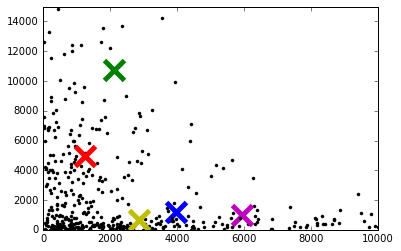

In [40]:
for i in range(len(centroids)):
    # Plot the points. Hint: Try using principal component analysis (PCA) to narrow down features.
    datapoints = data[np.where(labels==i)]
    plt.plot(datapoints[:,3], datapoints[:,4],'k.')  # Frozen, Detergents_Paper
    
    # Plot the centroids.
    centers = plt.plot(centroids[i,3], centroids[i,4],'x')
    plt.setp(centers, markersize=20.0)
    plt.setp(centers, markeredgewidth=5.0)

plt.xlim([0,10000])
plt.ylim([0,15000])
plt.show();

Note: we've zoomed in our axes, leaving out some outlier points and two centroids.